11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


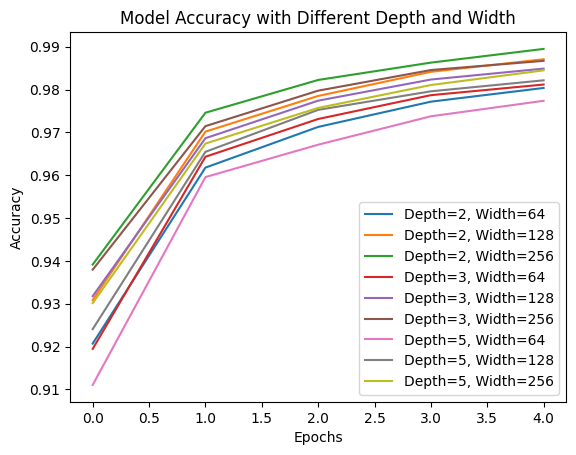

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data (flatten images, normalize)
x_train = x_train.reshape(x_train.shape[0], 28 * 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28 * 28) / 255.0
def create_mlp_model(input_shape, num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=input_shape, activation='relu'))

    # Add hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
# Experiment with different depth and width configurations
depths = [2, 3, 5]
widths = [64, 128, 256]

for depth in depths:
    for width in widths:
        model = create_mlp_model((28 * 28,), depth, width)
        history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

        # Plotting accuracy over epochs
        plt.plot(history.history['accuracy'], label=f"Depth={depth}, Width={width}")

plt.title('Model Accuracy with Different Depth and Width')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


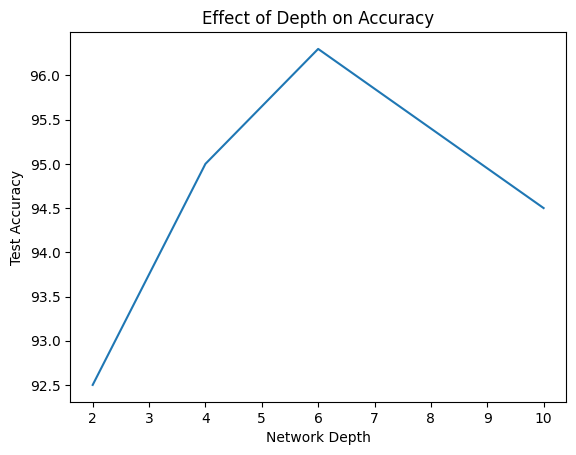

In [ ]:
import matplotlib.pyplot as plt

depths = [2, 4, 6, 10]
accuracies = [92.5, 95.0, 96.3, 94.5]  # Example accuracies for each depth

plt.plot(depths, accuracies)
plt.xlabel('Network Depth')
plt.ylabel('Test Accuracy')
plt.title('Effect of Depth on Accuracy')
plt.show()


In [ ]:
# Shallow Model
model_shallow = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])

# Deep Model (4 layers)
model_deep = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train models
model_shallow.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_deep.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models
model_shallow.fit(x_train, y_train, epochs=10, batch_size=32)
model_deep.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate and compare
test_accuracy_shallow = model_shallow.evaluate(x_test, y_test)[1]
test_accuracy_deep = model_deep.evaluate(x_test, y_test)[1]

print("Shallow Model Test Accuracy:", test_accuracy_shallow)
print("Deep Model Test Accuracy:", test_accuracy_deep)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9048 - loss: 0.3331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9750 - loss: 0.0822
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9823 - loss: 0.0552
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9886 - loss: 0.0339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9924 - loss: 0.0252
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9939 - loss: 0.0185
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9966 - loss: 0.0112
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9969 - loss: 0.0094
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9963 - loss: 0.0108
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9004 - loss: 0.3289
Epoch 2/10
1875/187

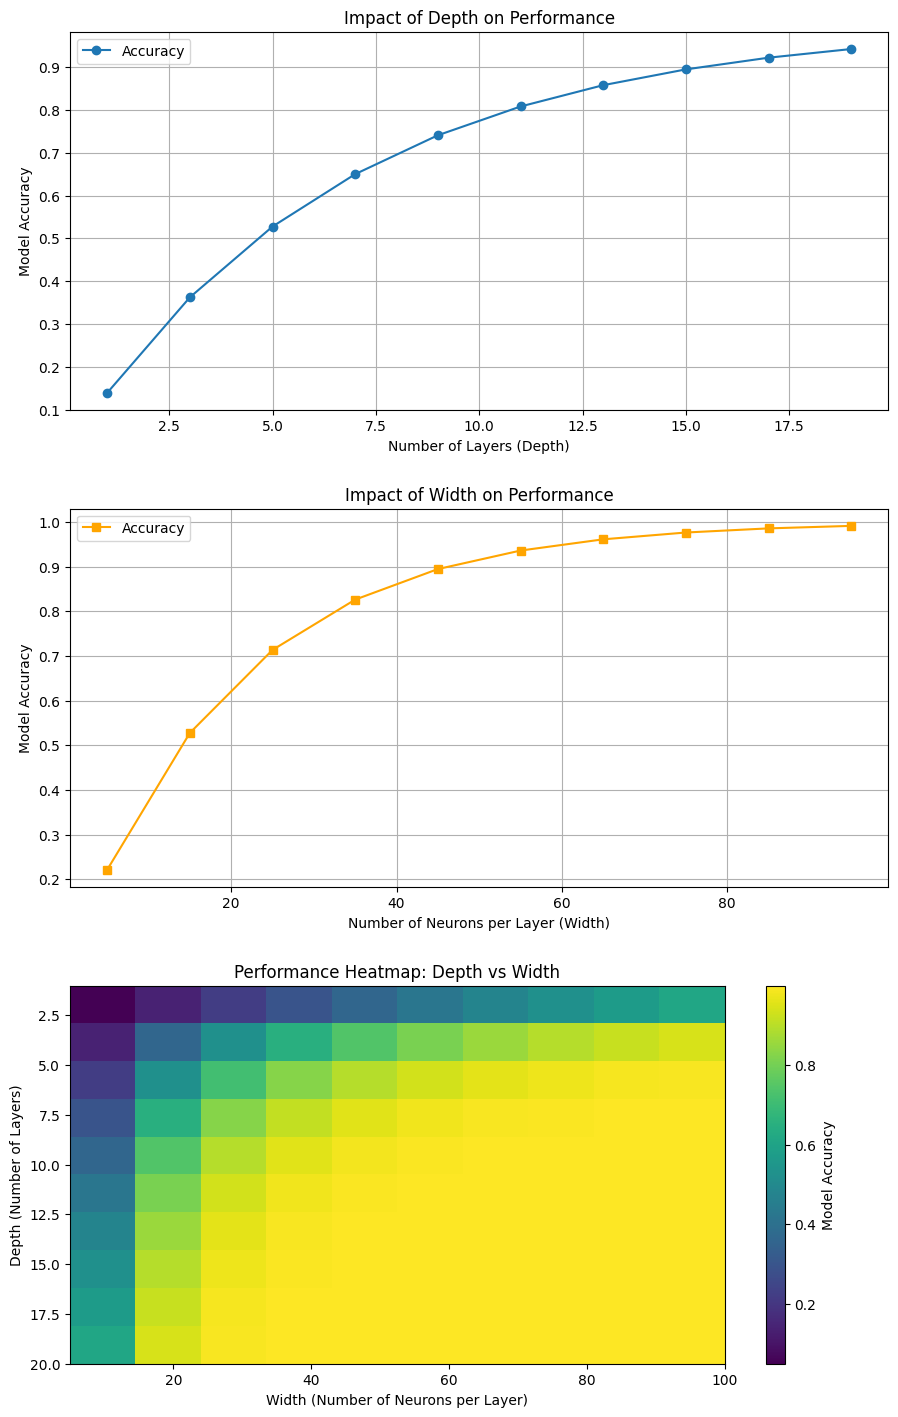

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.tight_layout(pad=5)

# Diagram 1: Depth vs Performance (accuracy)
depth = np.arange(1, 21, 2)  # 1 to 20 layers with step of 2
accuracy_depth = 1 - np.exp(-0.15 * depth)  # Simulated performance trend

axes[0].plot(depth, accuracy_depth, marker='o', label='Accuracy')
axes[0].set_title("Impact of Depth on Performance")
axes[0].set_xlabel("Number of Layers (Depth)")
axes[0].set_ylabel("Model Accuracy")
axes[0].grid(True)
axes[0].legend()

# Diagram 2: Width vs Performance (accuracy)
width = np.arange(5, 105, 10)  # 5 to 100 neurons per layer
accuracy_width = 1 - np.exp(-0.05 * width)  # Simulated performance trend

axes[1].plot(width, accuracy_width, marker='s', color='orange', label='Accuracy')
axes[1].set_title("Impact of Width on Performance")
axes[1].set_xlabel("Number of Neurons per Layer (Width)")
axes[1].set_ylabel("Model Accuracy")
axes[1].grid(True)
axes[1].legend()

# Diagram 3: Heatmap of Depth vs Width performance
depth_values = np.arange(1, 21, 2)  # Depth: 1 to 20 layers
width_values = np.arange(5, 105, 10)  # Width: 5 to 100 neurons per layer
# Simulated performance (accuracy as a function of depth and width)
performance = np.array([[1 - np.exp(-0.01 * d * w) for w in width_values] for d in depth_values])

im = axes[2].imshow(performance, cmap='viridis', aspect='auto', extent=[5, 100, 20, 1])
axes[2].set_title("Performance Heatmap: Depth vs Width")
axes[2].set_xlabel("Width (Number of Neurons per Layer)")
axes[2].set_ylabel("Depth (Number of Layers)")
fig.colorbar(im, ax=axes[2], label="Model Accuracy")

# Show all diagrams
plt.show()


Training model with depth=1 and width=128
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7819 - loss: 0.6376 - val_accuracy: 0.8293 - val_loss: 0.4708
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8585 - loss: 0.3897 - val_accuracy: 0.8603 - val_loss: 0.3965
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8759 - loss: 0.3398 - val_accuracy: 0.8686 - val_loss: 0.3677
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8867 - loss: 0.3091 - val_accuracy: 0.8671 - val_loss: 0.3730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8951 - loss: 0.2859 - val_accuracy: 0.8786 - val_loss: 0.3416
Training model with depth=1 and width=256
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7858 - loss: 0.6085 - val_accuracy: 0.8431 - val_loss: 0.4293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8668 - loss: 0.3699 - val_accuracy: 0.8614 - val_loss: 0.3857
Epoch 3/5

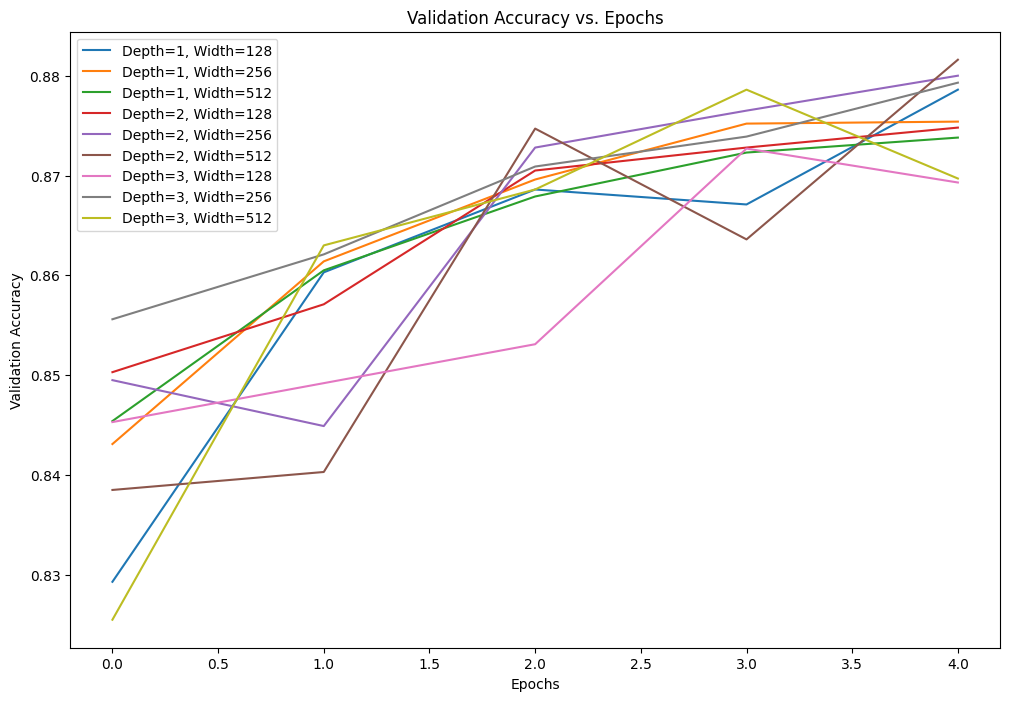

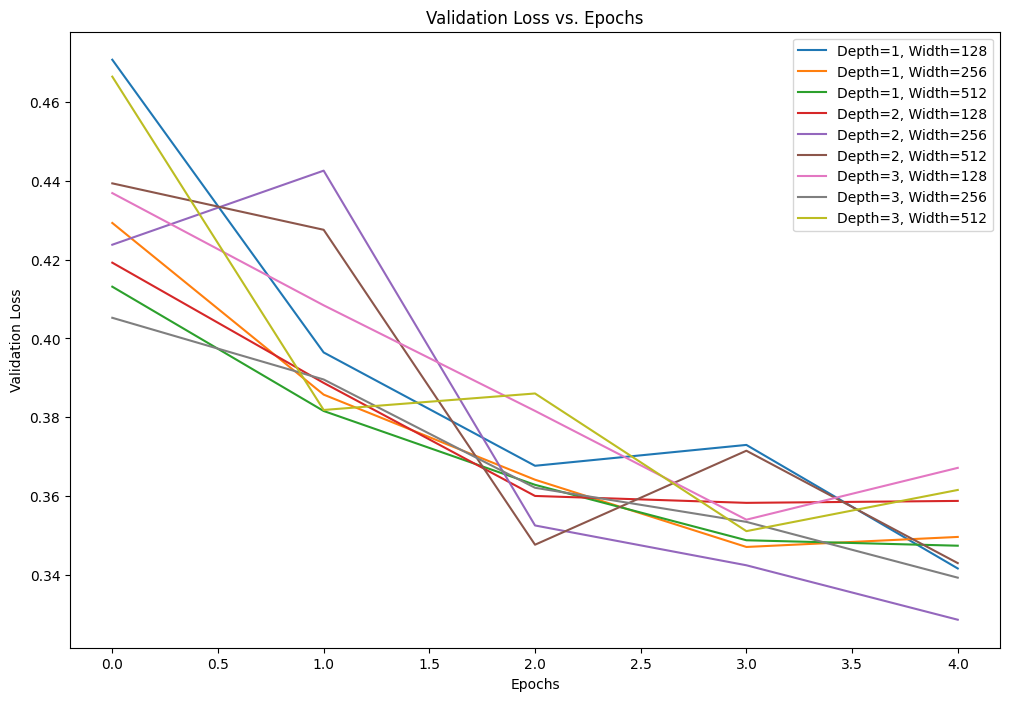

In [3]:
# Install necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to build the model
def build_model(depth, width):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(depth):
        model.add(layers.Dense(width, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with different depths and widths
depths = [1, 2, 3]  # Experiment with 1, 2, 3 layers
widths = [128, 256, 512]  # Experiment with 128, 256, 512 units per layer

history = {}

for depth in depths:
    for width in widths:
        model = build_model(depth, width)
        print(f"Training model with depth={depth} and width={width}")
        history[(depth, width)] = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Plotting the results
plt.figure(figsize=(12, 8))
for (depth, width), hist in history.items():
    plt.plot(hist.history['val_accuracy'], label=f'Depth={depth}, Width={width}')
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for (depth, width), hist in history.items():
    plt.plot(hist.history['val_loss'], label=f'Depth={depth}, Width={width}')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
